In [1]:
# import necessary libraries for a computer vision problem
import torch
from torch import nn 

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [2]:
# lets get a dataset to work on an example computer vision problem
# we can use MNIST dataset which contains thousands of handwritten digits
# but instead, lets work on FashionMNIST dataset, so lets download it

# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # get the training data
    download=True,
    transform=ToTensor() #images are in PIL format, it transforms them to pytorch tensors
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [33]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [34]:
image.shape
# [color channel, height, width]



torch.Size([1, 28, 28])

In [14]:
# lets see how many samples we have
print(f"len(train_data.data) : {len(train_data.data)}")
print(f"len(test_data.data): {len(test_data.data)}")
print()
# what are the classes?
class_names = train_data.classes
print(class_names)

len(train_data.data) : 60000
len(test_data.data): 10000

tensor([9, 0, 0,  ..., 3, 0, 5])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


(-0.5, 27.5, 27.5, -0.5)

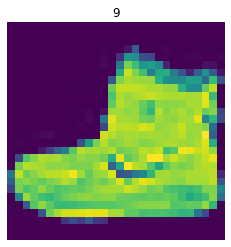

In [16]:
# lets visualize one of these datas
image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title(label)
plt.axis('off')

Text(0.5, 1.0, 'Ankle boot')

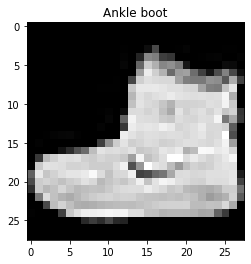

In [17]:
plt.imshow(image.squeeze(dim=0), cmap="gray")
plt.title(class_names[label])

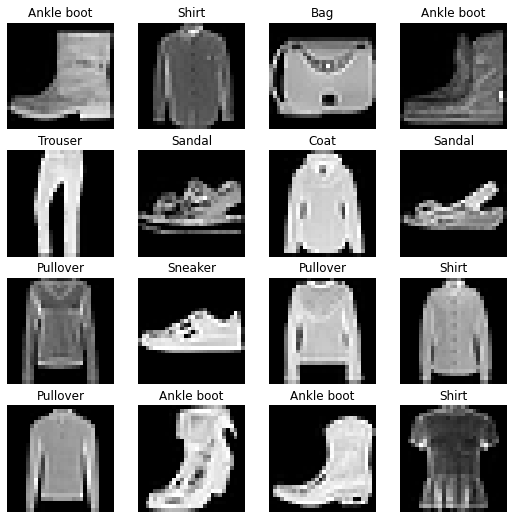

In [18]:
# let's see a few more images from this dataset
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for i in range(1, rows * cols +1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis("off")
    
    


In [79]:
# Now that we have a dataset, we need to create a dataloader
# it turns a large dataset into a sequence of smaller chunkes(batches) of images and labels

from torch.utils.data import DataLoader
BATCH_SIZE = 32 # how many samples per batch to load | Hyperparameter
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [80]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
label: 4, label size: torch.Size([])


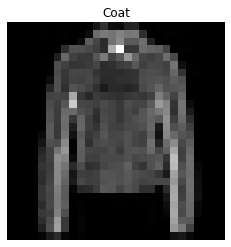

In [81]:
# lets see a sample

torch.manual_seed(42)
random_idx =  torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")
print(f"Image Size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

In [82]:

# we should start with a flatten model to change the data into simple vectors
flatten_model = nn.Flatten()

# get a single image from a batch of data
x = train_features_batch[0]

# flatten the data
output = flatten_model(x) # 784 = 28 * 28

# lets see the shape of the data
print(f"Shape of the image before flatten: {x.shape}")
print(f"Shape of the image after flatten: {output.shape}")



Shape of the image before flatten: torch.Size([1, 28, 28])
Shape of the image after flatten: torch.Size([1, 784])


In [83]:
# lets build a baseline model now with only 2 linear layers
from torch import nn
class FashionMNISTModelV0(nn.Module):
    
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        logits = self.layer_stack(x)
        return logits



In [84]:
# now let's create an instance of this model
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784, 
                              hidden_units=8, 
                              output_shape=10)

model_0.to("cpu")


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [27]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [32]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [35]:
# creating a timing function to see how long it takes to train the model
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
    """Prints the difference between a start and end time 
    
    Args:
        start (float): Start time of computation.
        end (float): End time of computation.
        device (torch.device, optional): Device computation was performed on. Defaults to None.
    
    Returns:
        float: time between start and end in seconds.
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.2f} seconds")
    return total_time

In [37]:
# Now let's create a training/evaluation loop
# we can use tqdm to visualize the training progress with a progress bar

from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n ----------")
    ## Training 
    train_loss = 0 # we calculate the loss for each batch and then take the average

    # we need a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        # Step 0: put the model on training mode
        model_0.train()

        # Step 1: forward pass
        y_pred = model_0(X)

        # Step 2: calculate the loss for each batch
        loss = loss_fn(y_pred, y)
        train_loss += loss 

        # Step 3: Optimizer zero grad
        optimizer.zero_grad()

        # Step 4: backward pass
        loss.backward()

        # Step 5: update the weights
        optimizer.step()

        # print how many samples model have seen
        if batch % 200 == 0:
            print(f"Looked at {batch * len(X)}/len(train_dataloader.dataset) samples")


    # Divide total train loss by length of train dataloader to get average train loss for epoch
    train_loss /= len(train_dataloader)


    ## Evaluation
    test_loss, test_acc = 0, 0

    # Step 0: put the model on evaluation mode
    model_0.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            # Step 1: forward pass
            y_pred = model_0(X)

            # Step 2: calculate the loss and accuracy for each batch
            test_loss += loss_fn(y_pred, y)
            test_acc += accuracy_fn(y_true = y, y_pred=y_pred.argmax(dim=1))
            

        # Divide total test loss by length of test dataloader to get average test loss for epoch
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    # Print what is happening around
    print(f"\nTrain loss: {train_loss:.2f} | Test loss: {test_loss:.2f} | Test accuracy: {test_acc:.2f}%")


# Calculate the training time
train_time_end_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_cpu, end=train_time_end_cpu, device="CPU")







  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 ----------
Looked at 0/len(train_dataloader.dataset) samples
Looked at 6400/len(train_dataloader.dataset) samples
Looked at 12800/len(train_dataloader.dataset) samples
Looked at 19200/len(train_dataloader.dataset) samples
Looked at 25600/len(train_dataloader.dataset) samples
Looked at 32000/len(train_dataloader.dataset) samples
Looked at 38400/len(train_dataloader.dataset) samples
Looked at 44800/len(train_dataloader.dataset) samples
Looked at 51200/len(train_dataloader.dataset) samples
Looked at 57600/len(train_dataloader.dataset) samples


 33%|███▎      | 1/3 [00:07<00:14,  7.41s/it]


Train loss: 0.45 | Test loss: 0.47 | Test accuracy: 83.45%
Epoch: 1 
 ----------
Looked at 0/len(train_dataloader.dataset) samples
Looked at 6400/len(train_dataloader.dataset) samples
Looked at 12800/len(train_dataloader.dataset) samples
Looked at 19200/len(train_dataloader.dataset) samples
Looked at 25600/len(train_dataloader.dataset) samples
Looked at 32000/len(train_dataloader.dataset) samples
Looked at 38400/len(train_dataloader.dataset) samples
Looked at 44800/len(train_dataloader.dataset) samples
Looked at 51200/len(train_dataloader.dataset) samples
Looked at 57600/len(train_dataloader.dataset) samples


 67%|██████▋   | 2/3 [00:14<00:07,  7.30s/it]


Train loss: 0.44 | Test loss: 0.51 | Test accuracy: 82.48%
Epoch: 2 
 ----------
Looked at 0/len(train_dataloader.dataset) samples
Looked at 6400/len(train_dataloader.dataset) samples
Looked at 12800/len(train_dataloader.dataset) samples
Looked at 19200/len(train_dataloader.dataset) samples
Looked at 25600/len(train_dataloader.dataset) samples
Looked at 32000/len(train_dataloader.dataset) samples
Looked at 38400/len(train_dataloader.dataset) samples
Looked at 44800/len(train_dataloader.dataset) samples
Looked at 51200/len(train_dataloader.dataset) samples
Looked at 57600/len(train_dataloader.dataset) samples


100%|██████████| 3/3 [00:21<00:00,  7.32s/it]


Train loss: 0.43 | Test loss: 0.52 | Test accuracy: 82.75%
Train time on CPU: 21.96 seconds


In [57]:
# now let's functionize the testing loop
# we need a function that takes our trained model, a DataLoader, a loss function and an accuracy function

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device = device):
        """ Returns a dictionary containing the results of model predicting on data_loader.
        Args:
            model (torch.nn.Module): a Pytorch model capable of making predictions on data_loader.
            data_loader (torch.utils.data.DataLoader): a Pytorch DataLoader containing data for model to evaluate.
            loss_fn (torch.nn.Module): a Pytorch loss function used for evaluating model prediction results.
            accuracy_fn (function): a function for calculating model accuracy.

        Returns:
            (dict): Results of model making predictions on data_loader
        """

        loss, acc = 0, 0
        model.eval()
        with torch.inference_mode():
            for X, y in data_loader:
                y_pred = model(X)

                loss += loss_fn(y_pred, y)
                acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
                
            loss /= len(data_loader)
            acc /= len(data_loader)
            return {"model_name": model.__class__.__name__,
                    "model_loss": loss.item(),
                    "model_acc": acc}
        
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5178602933883667,
 'model_acc': 82.78753993610223}

In [58]:
# for the next model, we want to write a device agnostic code, so if you have a GPU, you can leverage its power
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [105]:
# As for our 2nd model, let's add a non-linear activation function to our hidden layer
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [106]:
# lets create an instance of this model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=16,
                              output_shape=10).to(device)

# lets check the device for this mode
next(model_1.parameters()).device

device(type='cpu')

In [107]:
# before making a training loop, we need a loss function and an optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [114]:
# now lets functionize the training and testing loops
def train_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
    training_loss, training_acc = 0, 0
    model.to(device)
    
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        training_loss += loss

        acc = accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        training_acc += acc

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    # calculate the average loss and accuracy for the epoch
    training_loss /= len(data_loader)
    training_acc /= len(data_loader)
    print(f"Training Loss: {training_loss:.2f} | Training Accuracy: {training_acc:.2f}%")



    


In [115]:
def test_step(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            y_pred = model(X)

            loss = loss_fn(y_pred, y)
            test_loss += loss

            acc = accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
            test_acc += acc

        # calculate the average loss and accuracy for the epoch
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.2f} | Test Accuracy: {test_acc:.2f}%\n")

In [116]:
# now lets use them and also measure how long it will take to train the model on the GPU (if we have one)
from timeit import default_timer as timer 
train_time_start_gpu = timer()
epoch = 3

for epoch in tqdm(range(epoch)):
    print(f"Epoch: {epoch} \n ----------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
                data_loader=test_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn,
                device=device)
    
train_time_end_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_gpu, end=train_time_end_gpu, device="GPU")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 ----------
Training Loss: 0.41 | Training Accuracy: 85.30%


 33%|███▎      | 1/3 [00:07<00:14,  7.44s/it]

Test Loss: 0.44 | Test Accuracy: 84.18%

Epoch: 1 
 ----------
Training Loss: 0.39 | Training Accuracy: 85.89%


 67%|██████▋   | 2/3 [00:14<00:07,  7.46s/it]

Test Loss: 0.42 | Test Accuracy: 84.95%

Epoch: 2 
 ----------
Training Loss: 0.38 | Training Accuracy: 86.20%


100%|██████████| 3/3 [00:22<00:00,  7.43s/it]

Test Loss: 0.45 | Test Accuracy: 84.09%

Train time on GPU: 22.28 seconds


In [117]:
# now lets use the evaluation function that we coded previously and evaluate this model.
model_1_reults = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_1_reults

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.45188605785369873,
 'model_acc': 84.10543130990415}

In [124]:
# now lets build a conolutional neural network
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units*7*7,
                      out_features=output_shape) # 7*7 is the output shape of the last conv layer
        )

    def forward(self, x):
        x=self.block_1(x)
        #print(x.shape)
        x=self.block_2(x)
        #print(x.shape)
        x=self.classifier(x)
        #print(x.shape)
        return x


# lets create an instance of this model
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
        


In [125]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)

In [126]:
# Let's train our model now
# we have already created fuctions for training and testing, so we can use them

from timeit import default_timer as timer 
train_time_start_model_2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n ----------")

    train_step(model_2, train_dataloader, loss_fn, optimizer, accuracy_fn, device)

    test_step(model_2, test_dataloader, loss_fn, accuracy_fn, device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2, end=train_time_end_model_2, device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 ----------
Training Loss: 0.58 | Training Accuracy: 78.96%


 33%|███▎      | 1/3 [01:10<02:20, 70.16s/it]

Test Loss: 0.39 | Test Accuracy: 85.42%

Epoch: 1 
 ----------
Training Loss: 0.36 | Training Accuracy: 87.00%


 67%|██████▋   | 2/3 [02:20<01:10, 70.47s/it]

Test Loss: 0.37 | Test Accuracy: 86.36%

Epoch: 2 
 ----------
Training Loss: 0.32 | Training Accuracy: 88.53%


100%|██████████| 3/3 [03:31<00:00, 70.54s/it]

Test Loss: 0.32 | Test Accuracy: 88.44%

Train time on cpu: 211.62 seconds


In [127]:
# now lets use our evaluate function to evaluate this model
model_2_results = eval_model(model_2, test_dataloader, loss_fn, accuracy_fn, device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32327666878700256,
 'model_acc': 88.4285143769968}

In [129]:
# now lets compare the models that we've built so far
import pandas as pd
compare_results=pd.DataFrame([model_0_results, model_1_reults, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.517860,82.787540
1,FashionMNISTModelV1,0.451886,84.105431
2,FashionMNISTModelV2,0.323277,88.428514


In [130]:
compare_results["training_time"]= [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.517860,82.787540,21.957834
1,FashionMNISTModelV1,0.451886,84.105431,22.284355
2,FashionMNISTModelV2,0.323277,88.428514,211.623771


In [142]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [143]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [144]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[7.7150e-08, 8.7425e-10, 5.0400e-09, 6.1435e-10, 2.7141e-08, 9.9996e-01,
         6.5709e-07, 5.2651e-07, 3.4089e-06, 3.8379e-05],
        [6.3882e-02, 8.1761e-01, 6.0201e-04, 5.6033e-02, 1.7663e-02, 5.7056e-05,
         4.3979e-02, 1.3616e-04, 2.9502e-05, 1.2153e-05]])

In [145]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[7.7150e-08, 8.7425e-10, 5.0400e-09, 6.1435e-10, 2.7141e-08, 9.9996e-01,
         6.5709e-07, 5.2651e-07, 3.4089e-06, 3.8379e-05],
        [6.3882e-02, 8.1761e-01, 6.0201e-04, 5.6033e-02, 1.7663e-02, 5.7056e-05,
         4.3979e-02, 1.3616e-04, 2.9502e-05, 1.2153e-05]])

In [146]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [147]:
# Are our predictions in the same form as our test labels? 
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

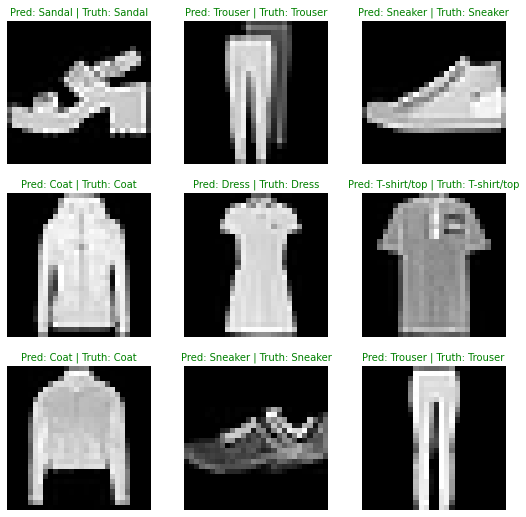

In [149]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);